In [31]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve

In [32]:
data=pd.read_csv('income_evaluation.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [33]:
data.columns.values

array(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week',
       ' native-country', ' income'], dtype=object)

# features

<b>age</b>- the age of the person	<br>
<b>workclass</b>- a general term to represent the employment status of an individual	<br>
<b>fnlwgt</b>- final weight. In other words, this is the number of people the census believes	
the entry represents<br>
<b>education</b>- the highest level of education achieved by an individual.	<br>
<b>education num</b>-  the highest level of education achieved in numerical form.	<br>
<b>marital status</b>- marital status of an individual.	<br>
<b>occupation</b>- the general type of occupation of an individual	<br>
<b>relationship</b>- this feature is not been used	<br>
<b>race</b>- Descriptions of an individual’s race	<br>
<b>sex</b>- the sex of the individual	<br>
<b>capital gain</b>- capital gains for an individual	<br>
<b>capital loss</b>- capital loss for an individual	<br>
<b>hours per week</b>-  the hours an individual has reported to work per week	<br>
<b>native country</b>-  country of origin for an individual	<br>

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [35]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [36]:
data=data.dropna(how='any',axis=0)

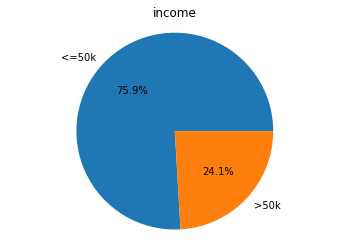

In [37]:

plt.pie(data[' income'].value_counts().values,labels=['<=50k','>50k'],autopct='%1.1f%%')
plt.title('income')
plt.axis('equal')
plt.show()

In [38]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
def chang_to_num(name):
    data[name]=le.fit_transform(data[name])
    print(data[name])
for name in data.columns.values:
    chang_to_num(name)

0        22
1        33
2        21
3        36
4        11
         ..
32556    10
32557    23
32558    41
32559     5
32560    35
Name: age, Length: 32561, dtype: int64
0        7
1        6
2        4
3        4
4        4
        ..
32556    4
32557    4
32558    4
32559    4
32560    5
Name:  workclass, Length: 32561, dtype: int32
0         2671
1         2926
2        14086
3        15336
4        19355
         ...  
32556    16528
32557     8080
32558     7883
32559    12881
32560    17825
Name:  fnlwgt, Length: 32561, dtype: int64
0         9
1         9
2        11
3         1
4         9
         ..
32556     7
32557    11
32558    11
32559    11
32560    11
Name:  education, Length: 32561, dtype: int32
0        12
1        12
2         8
3         6
4        12
         ..
32556    11
32557     8
32558     8
32559     8
32560     8
Name:  education-num, Length: 32561, dtype: int64
0        4
1        2
2        0
3        2
4        2
        ..
32556    2
32557    2
32558 

In [39]:
y=data[' income']
x=data[['age',' sex',' education-num',' occupation',' marital-status',' relationship',' capital-gain',' capital-loss']]
print(x.head())
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.6,random_state = 0)


   age   sex   education-num   occupation   marital-status   relationship  \
0   22     1              12            1                4              1   
1   33     1              12            4                2              0   
2   21     1               8            6                0              1   
3   36     1               6            6                2              0   
4   11     0              12           10                2              5   

    capital-gain   capital-loss  
0             25              0  
1              0              0  
2              0              0  
3              0              0  
4              0              0  


# knn

In [40]:
accuracy=[]
for k in range(1,16):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, y_pred))
print(accuracy)

[0.8047600767754318, 0.8290978886756238, 0.8292514395393474, 0.8406909788867563, 0.837236084452975, 0.8441458733205375, 0.8419193857965451, 0.8442994241842611, 0.8446065259117083, 0.8457581573896353, 0.8448368522072937, 0.8469097888675624, 0.8477543186180422, 0.8471401151631478, 0.8468330134357006]


In [41]:
print("the number of neighbors with the highest accuracy is: ",accuracy.index(max(accuracy))+1)
print('the accuracy is: ',max(accuracy))

the number of neighbors with the highest accuracy is:  13
the accuracy is:  0.8477543186180422


In [42]:
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, x, y, cv=5)
scores

array([0.80776908, 0.80328624, 0.80988943, 0.80297912, 0.81173219])

Text(0.5, 1.0, 'Confiusion Matrix')

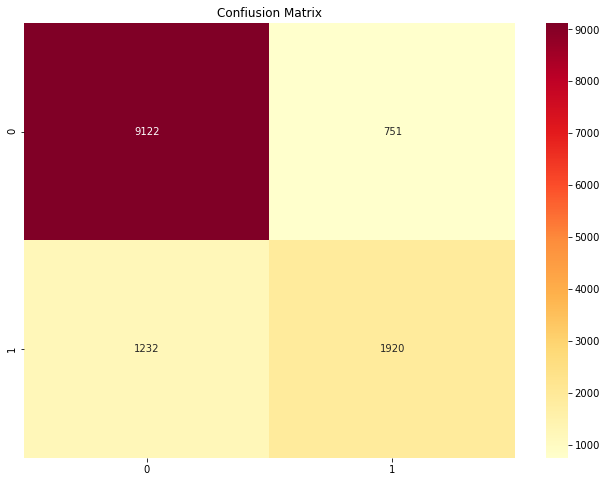

In [43]:
knn=KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
pred=knn.predict(X_test)
con=confusion_matrix(y_test, pred)
f, ax = plt.subplots(figsize=(11, 8))
sns.heatmap(con, annot=True, fmt='g', cmap="YlOrRd")
plt.title('Confiusion Matrix')

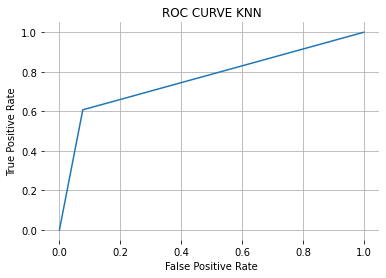

In [44]:
fpr, tpr, thresholds= roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.title('ROC CURVE KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.box(False)
plt.show()

# Logistic Regression

In [45]:
reg=LogisticRegression(solver='liblinear',C=0.1,penalty='l2')
reg.fit(X_train,y_train)
reg.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1])

In [46]:
y_pred = reg.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.8220345489443378

Text(0.5, 1.0, 'Confiusion Matrix')

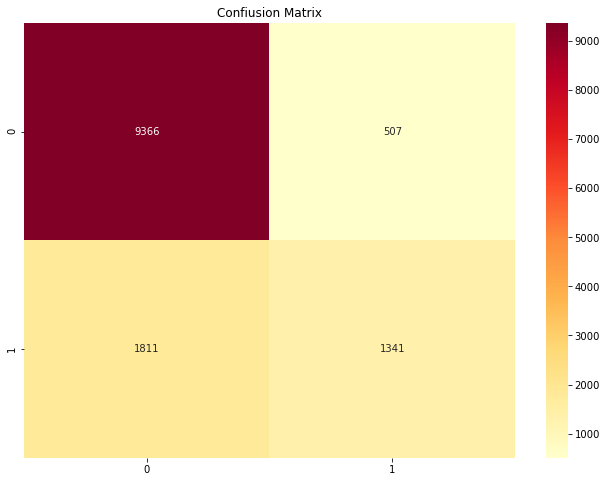

In [48]:

con=confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize=(11, 8))
sns.heatmap(con, annot=True, fmt='g', cmap="YlOrRd")
plt.title('Confiusion Matrix')

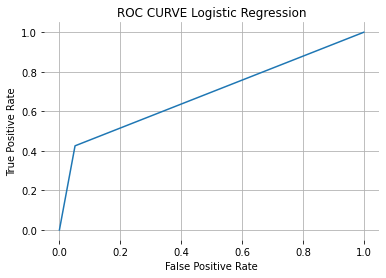

In [50]:
fpr, tpr, thresholds= roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.title('ROC CURVE Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.box(False)
plt.show()